Perusahaan peminjaman sepeda di San Fransisco memintamu untuk menganalisa durasi perjalanan customer mereka. Untuk memudahkan analisa, lakukan hal-hal berikut ini:

---

Data dapat diakses dari BigQuery dengan ketentuan:

- Project_id: `bigquery-public-data`
- Dataset: `san_francisco_bikeshare`
- Table: `bikeshare_trips`
- Ambil hanya kolom `duration_sec` saja
- Berikan LIMIT pada data yang diambil sebesar 3000 entry data

Koneksikan data di atas menggunakan `BigQuery` ke Google Colab dengan code berikut:
```py
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

  project_id = "rock-wonder-317907" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)
```

Untuk melakukan Query menggunakan cara ini, kamu dapat menggunakan method `client.query('Masukkan Querynya').to_dataframe()`. Outputnya akan berupa Pandas dataframe, sehingga harus import Pandas.

Contoh:

```py
df = client.query('''
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
WHERE created_at < "2022-07-01"
ORDER BY year,month ASC
''').to_dataframe()
```



In [70]:
from google.colab import auth
from google.cloud import bigquery
import scipy
import statistics
from scipy.stats import skew
from scipy.stats import kurtosis

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [1]:
auth.authenticate_user()
print('Authenticated')

project_id = "ngc7-405813" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = client.query('''
SELECT duration_sec
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
LIMIT 3000
''').to_dataframe()

df.to_csv('/content/drive/My Drive/Colab Notebooks/data.csv',index = False)

In [39]:
df

,duration_sec
0,1047
1,421
2,259
3,280
4,295
...,...
2995,442
2996,610
2997,458
2998,488


## **STATISTIK DESKRIPTIF**

1. Lakukan perhitungan central tendency (mean, median, dan modus).
2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range).
3. Lakukan pengecekan skewness dan kurtosis.
3. Analisa apakah ada data outlier berdasarkan sebaran datanya.
4. Cari tahu berapa persentase outlier terhadap data keseluruhan.
5. Bagaimana perubahan pemusatan data sebelum dan sesudah penghapusan outlier?

In [82]:
# There are three main measures of central tendency (Mean, Median, Modus)
mean = df['duration_sec'].mean()
median = df['duration_sec'].median()
mode = df['duration_sec'].mode().values[0]

# Calculating variance
variance = df['duration_sec'].var()

# Calculating standard deviation
st_dev = df['duration_sec'].std()

# Calculating range
range = df['duration_sec'].max() - df['duration_sec'].min()

print("mean: ",mean,"\nmedian: ", median,"\nmode: ", mode,"\n\nvariance: ",variance, "\nstandard deviation: ", st_dev, "\nrange: ", range)

mean:  1009.942 
median:  511.0 
mode:  207 

variance:  21057642.33074625 
standard deviation:  4588.860678942678 
range:  168332


In [83]:
print(f"Skewness: {df['duration_sec'].skew()}")
print(f"Kurtosis: {df['duration_sec'].kurtosis()}")

Skewness: 23.376791156288647
Kurtosis: 701.8957764973363


# Outliers and Extreme Values Analysis

<Axes: >

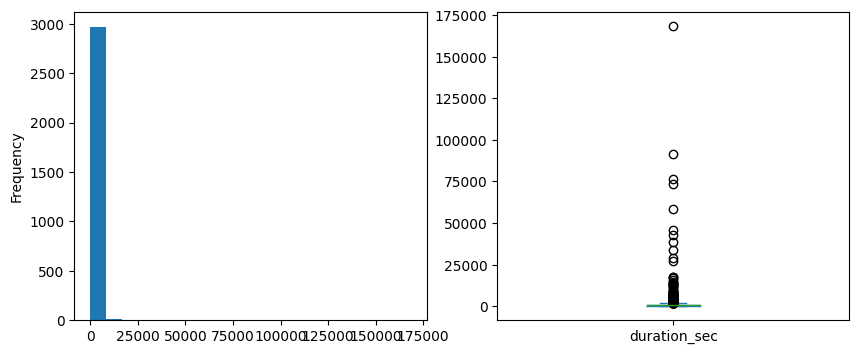

In [84]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['duration_sec'].plot(kind='hist',bins=20,ax=ax[0])
df['duration_sec'].plot(kind='box',ax=ax[1])

## Skew Distribution: Tukey's Rule

In [85]:
q1 = df['duration_sec'].quantile(0.25)
q3 = df['duration_sec'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 1698.62
Lower Boundary: -558.38


In [95]:
outlier = df['duration_sec'][(df['duration_sec']<low_bound) | (df['duration_sec']>up_bound)]
no_outlier = df['duration_sec'][(df['duration_sec']>=low_bound) & (df['duration_sec']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["duration_sec"]):.2f}%')


Percentage of outliers: 6.10%


<Axes: >

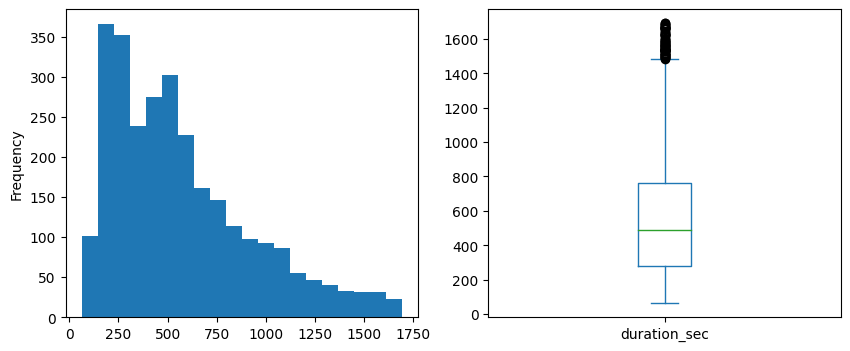

In [87]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [98]:
no_outlier.to_csv('data_cleaned.csv',index = False)

In [102]:
# no_outlier
# outlier

variance = no_outlier.mean()
variance

569.5136670216542

## **API**

Buatlah API untuk:
- `Menampilkan` seluruh entry data setelah dilakukan handling outlier.
- `Menghapus` entry data, dari data yang telah dihandling outlier.

clue:
- Load data csv yang sudah diolah dengan pandas, kemudian konversi data ke dictionary `df.to_dict()` atau json `df.to_json()` untuk dapat diolah lebih lanjut dengan API menggunakan FastAPI.
- Pembuatan API dilakukan pada script `.py`
- Endpoint dan penamaan function pada API dibebaskan.



In [1]:
import pandas as pd

# pandas dataframe to json
df = pd.read_csv('data_cleaned.csv')
df = df.to_dict()

for id in df['duration_sec'].keys():
    print(df['duration_sec'][id])


C:\Users\Gilbert KH\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


1047
421
259
280
295
300
384
275
347
930
836
581
545
1415
764
894
247
786
1053
913
164
87
320
1537
219
1106
1200
468
852
958
423
591
749
623
430
348
626
606
1267
827
293
274
267
375
272
341
242
356
332
420
382
357
391
339
443
486
428
535
600
411
813
446
716
963
849
1104
502
480
547
582
505
589
586
490
508
627
501
509
679
671
615
1178
617
668
653
648
629
589
470
613
540
498
549
977
496
620
723
637
623
393
532
672
1101
642
1009
504
327
513
520
971
563
646
643
476
560
797
1351
757
700
859
688
730
618
681
475
704
638
522
650
604
1086
887
722
544
1427
1363
837
912
694
869
774
540
1000
656
942
506
1068
1463
1125
1105
1595
1375
872
430
547
627
664
658
964
773
780
569
888
1081
725
949
992
1008
862
785
753
739
695
736
774
926
742
852
904
722
809
846
753
1100
890
702
853
589
852
1021
604
802
639
779
933
803
819
1252
737
746
750
925
1024
874
864
954
811
1303
1564
1672
552
748
650
999
649
717
506
500
713
202
206
391
221
291
219
162
188
219
201
576
213
166
748
331
458
466
501
568
561
655
1027
825
9

In [3]:
value = input("Masukkan data yang ingin dihapus: ")

if value not in df['duration_sec'].keys():
   print("Data not found")
else:
    df['duration_sec'].pop(value)
    print("Data deleted")

Data not found


: 